In [2]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import random

In [4]:
shear_filter = pd.read_csv('/Users/samueleckford/Scripts/Shear Prediction/Quads/shear_master_df_Quad 21.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
shear_filter.head()

,DT,GR,RHOB,Wellname,Depth,GRWS,NPOWS,DRESWS,MRESWS,SRESWS,DTWS,DENWS,DTSWS,DEN,MRES,DTS,DRES,NPO,SRES
0,120.9238,37.3865,2.4670,10-1-1,1877.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123.2250,36.9812,2.4605,10-1-1,1877.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,119.7109,36.1743,2.4540,10-1-1,1878.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,116.2000,36.7265,2.4350,10-1-1,1878.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106.4688,37.4497,2.4160,10-1-1,1878.424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Lists with different log name abbreviations, can be edited as needed
GR_list = ['GR', 'gr', 'GRWS']
DT_list = ['dt', 'dtws', 'DT', 'DTWS']
DTS_list = ['DTS', 'dts', 'DTSWS', 'dtsws']
Res_list = ['DRESWS', 'DRES', 'MRESWS', 'MRES', 'SRESWS', 'SRES']
Rhob_list = ['RHOB', 'RHOBWS', 'RHO', 'RHOWS', 'DEN', 'DENWS']
Npo_list = ['NPOWS', 'NPO']

In [6]:
label_list = GR_list + DT_list + DTS_list + Res_list + Rhob_list + Npo_list + ['Depth'] + ['Wellname']

In [7]:
def column_merge(df, col1, col2):
    print(col1 + " " + str(df[col1].count()))
    df[col1].fillna(df[col2], inplace=True)
    del df[col2]
    print(col1 + " " + str(df[col1].count()))

In [35]:
column_merge(shear_filter, 'RHOB', 'DENWS')
column_merge(shear_filter, 'RHOB', 'DEN')
column_merge(shear_filter, 'GR', 'GRWS')
column_merge(shear_filter, 'DT', 'DTWS')
column_merge(shear_filter, 'SRES', 'SRESWS')
column_merge(shear_filter, 'DRES', 'DRESWS')
column_merge(shear_filter, 'MRES', 'MRESWS')
column_merge(shear_filter, 'NPO', 'NPOWS')
column_merge(shear_filter, 'DTS', 'DTSWS')
#column_merge(shear_filter, 'SP', 'SPWS')
column_merge(shear_filter, 'CAL', 'CALWS')
column_merge(shear_filter, 'PEF', 'PEFWS')
column_merge(shear_filter, 'CAL', 'CALI')

RHOB 3615049
RHOB 6276327
RHOB 6276327
RHOB 6487066
GR 7396978
GR 12920523
DT 9991271
DT 14175312
SRES 7219
SRES 2803128
DRES 19651
DRES 4244408
MRES 56868
MRES 3229517
NPO 12412
NPO 2541612
DTS 73644
DTS 688670


KeyError: 'SP'

In [36]:
column_merge(shear_filter, 'CAL', 'CALWS')
column_merge(shear_filter, 'PEF', 'PEFWS')
column_merge(shear_filter, 'CAL', 'CALI')

KeyError: 'CAL'

In [663]:
def median_replace(df, log='RHOB', rolling_window=5):
    df['median'] = df.groupby('Wellname')[log].rolling(window=rolling_window).median().reset_index(0,drop=True).shift((int(rolling_window/2)))
    column_merge(df, log, 'median')
    return df

In [666]:
shear_filter = median_replace(shear_filter)

# Need to calculate the proportion of NaN's in each well


RHOB 3618191
RHOB 3619139


In [601]:
shear_filter.rename({'CONDWS':'COND'}, axis='columns', inplace=True)

In [579]:
del shear_filter['SP']

In [58]:
# groupy wellname, percentage of nulls for log, if its over a certain threshold
## groupby wellname, sort by depth

shear_filter = shear_filter.dropna(axis=0, subset=['DTS'])
shear_filter = shear_filter.dropna(axis=0, subset=['RHOB'])
shear_filter = shear_filter.dropna(axis=0, subset=['DT'])
shear_filter = shear_filter.dropna(axis=0, subset=['GR'])
shear_filter = shear_filter.dropna(axis=0, subset=['MRES'])
shear_filter = shear_filter.dropna(axis=0, subset=['SRES'])
shear_filter = shear_filter.dropna(axis=0, subset=['NPO'])
shear_filter = shear_filter.dropna(axis=0, subset=['DRES'])
#shear_filter = shear_filter.dropna(axis=0, subset=['CAL'])
#shear_filter = shear_filter.dropna(axis=0, subset=['PEF'])

In [40]:
test=shear_filter[shear_filter['Wellname']=='14-28b-4'].copy()
test_log = 'GR'
test.GR.isna().sum()/len(test)

0.00848216637690322

In [46]:
pd.set_option('display.max_rows', 20000)

In [52]:
"""
Compute sample rate and establish a window length
dropna over threshold of isna flag e.g. 50 samples
impute rest of nulls, filter flag=False or rolling mean
"""
test['GR_flag'] = test.GR.isna()
test['GR_flag_rolling'] = test['GR_flag'].rolling(window=20, center=True).sum()

test['GR_flag_sum'] = test[(test['GR_flag']==True)]['GR'].sum()
test.head(20)

,DT,GR,RHOB,Wellname,Depth,MRES,DTS,DRES,NPO,SRES,GR_flag,GR_flag_rolling,GR_previous,GR_next,GR_flag_sum
3070771,NaN,58.7666,NaN,14-28b-4,481.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,58.3331,0.0
3070772,NaN,58.3331,NaN,14-28b-4,481.5,NaN,NaN,NaN,NaN,NaN,False,NaN,58.7666,58.9208,0.0
3070773,NaN,58.9208,NaN,14-28b-4,482.0,NaN,NaN,NaN,NaN,NaN,False,NaN,58.3331,59.3344,0.0
3070774,NaN,59.3344,NaN,14-28b-4,482.5,NaN,NaN,NaN,NaN,NaN,False,NaN,58.9208,60.2480,0.0
3070775,NaN,60.2480,NaN,14-28b-4,483.0,NaN,NaN,NaN,NaN,NaN,False,NaN,59.3344,61.6771,0.0
3070776,NaN,61.6771,NaN,14-28b-4,483.5,NaN,NaN,NaN,NaN,NaN,False,NaN,60.2480,63.1934,0.0
3070777,NaN,63.1934,NaN,14-28b-4,484.0,NaN,NaN,NaN,NaN,NaN,False,NaN,61.6771,64.0332,0.0
3070778,NaN,64.0332,NaN,14-28b-4,484.5,NaN,NaN,NaN,NaN,NaN,False,NaN,63.1934,62.5662,0.0
3070779,NaN,62.5662,NaN,14-28b-4,485.0,NaN,NaN,NaN,NaN,NaN,False,NaN,64.0332,60.7826,0.0
3070780,NaN,60.7826,NaN,14-28b-4,485.5,NaN,NaN,NaN,NaN,NaN,False,NaN,62.5662,61.2322,0.0


In [59]:
shear_filter.isna().sum()

DT          0
GR          0
RHOB        0
Wellname    0
Depth       0
MRES        0
DTS         0
DRES        0
NPO         0
SRES        0
dtype: int64

In [62]:
print(shear_filter['Wellname'].nunique())
top_count = shear_filter.groupby('Wellname')['DTS'].mean().sort_values()#.iloc[5:-5]
top_count = list(top_count.keys())
random.shuffle(top_count)

df = shear_filter.copy()

52


In [645]:
def filter(df, log='RHOB', filter_window=40, harshness=0.995, loops=3):
    """ A median filter based fuction, filter_window and harshness control the strength of the filter"""
    for i in range(loops):
        #df['Z'] = np.abs(df[log] - df[log].shift(-1))
        shift = -int(filter_window/2)
        df['median'] = df.groupby('Wellname')[log].rolling(window=filter_window).median().reset_index(0,drop=True).shift(shift)
        df['Z'] = np.abs(df['median'] - df[log])
        threshold = df['Z'].quantile(harshness)
        df[log] = np.where(df.Z > threshold, df['median'], df[log])
    # Plot the results
    plt.figure(figsize=(25, 12))
    well = top_count[0]
    #intensity_modified_z_score = np.array(modified_z_score(delta_int))
    plt.plot(df[df["Wellname"] == well]["Depth"], np.abs(((df[df["Wellname"] == well][log]) - (shear_filter[shear_filter["Wellname"] == well][log]))), linewidth=0.6, color='green', label=log + 'Spikes')
    plt.plot(shear_filter[shear_filter["Wellname"] == well]["Depth"], shear_filter[shear_filter["Wellname"] == well][log], linewidth=0.6, color='black', label=log + ' original ')
    plt.plot(df[df["Wellname"] == well]["Depth"], df[df["Wellname"] == well]["Z"])
    plt.plot(df[df["Wellname"] == well]["Depth"], df[df["Wellname"] == well][log], linewidth=0.6, color='red', label=log + ' new ')
    plt.axhline(y=threshold, color="black", linestyle="--")
    plt.title('De-spiked well log for well - ' + well)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('Depth', fontsize = 20)
    plt.ylabel(log, fontsize = 20)
    plt.legend()
    plt.show()
    del df['Z']
    del df['median']
    return df[log]

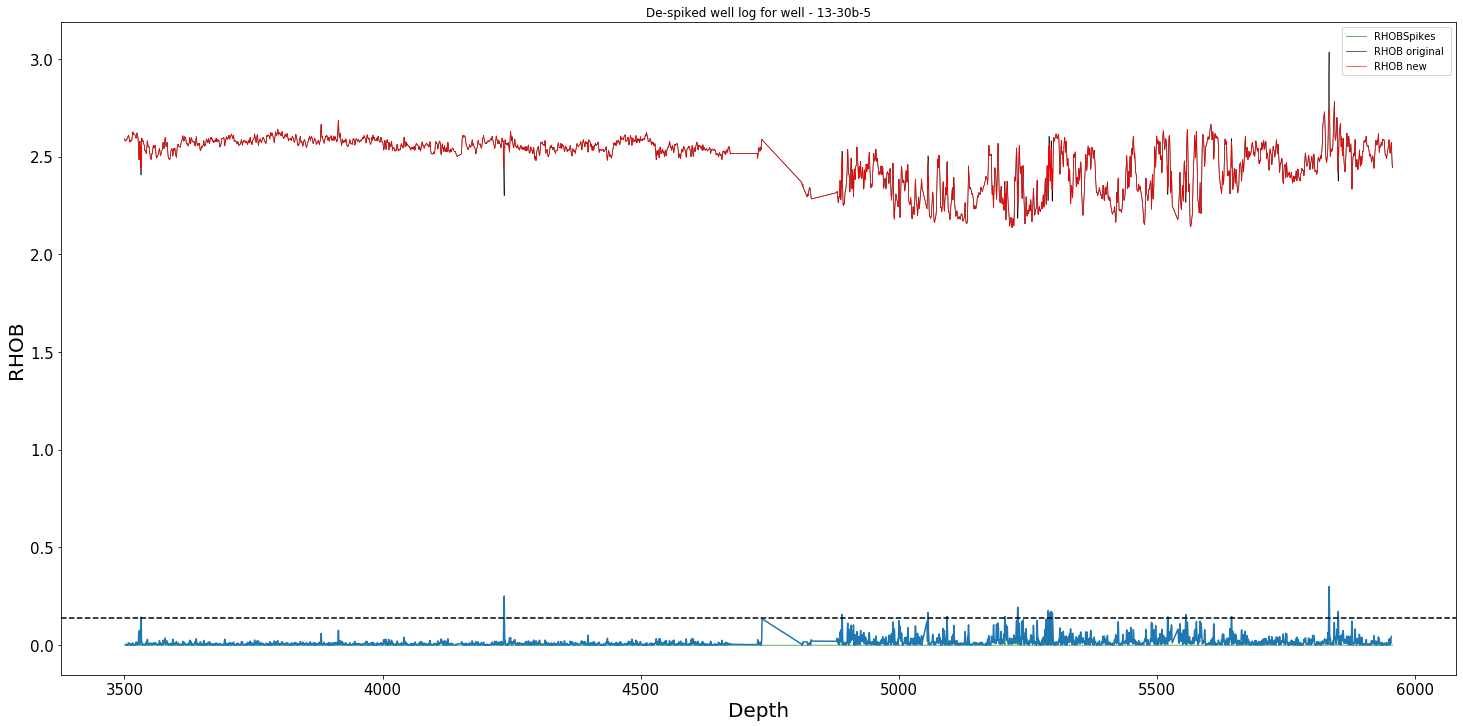

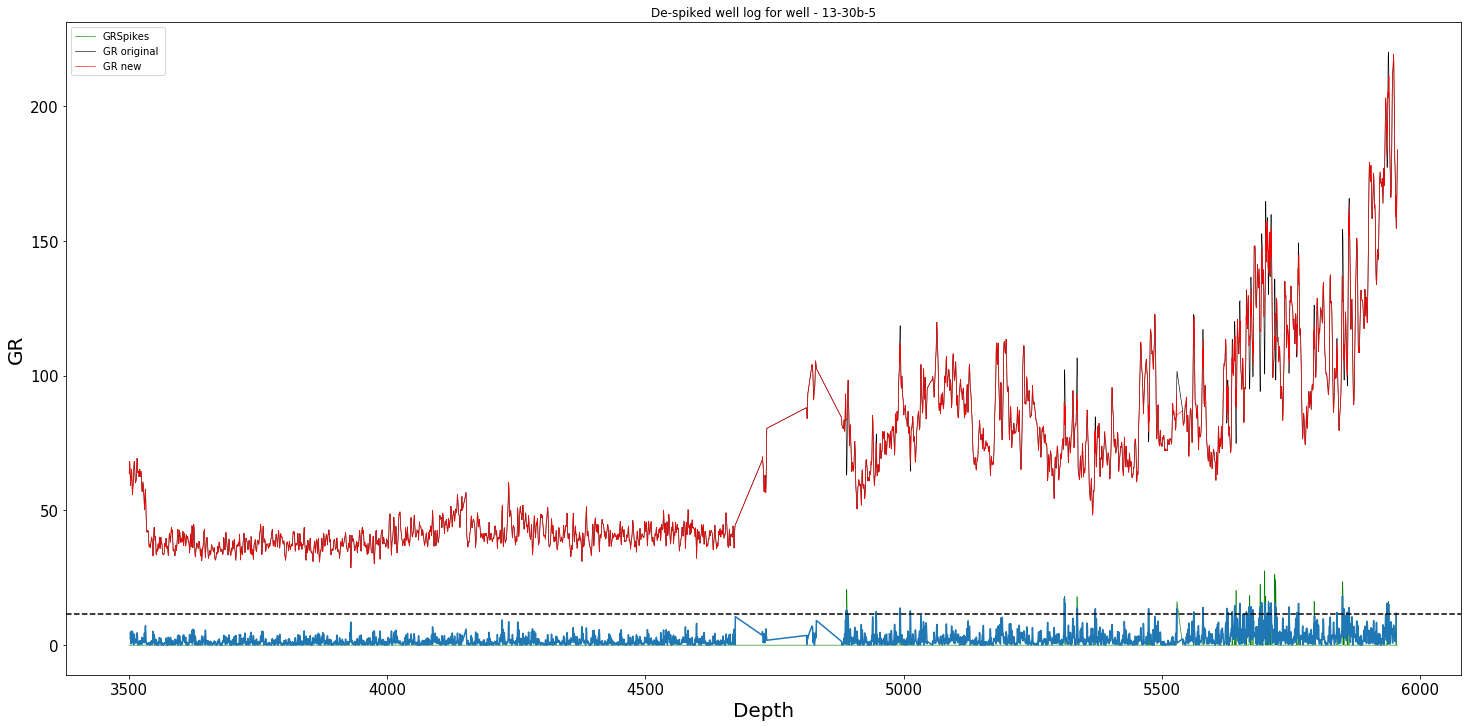

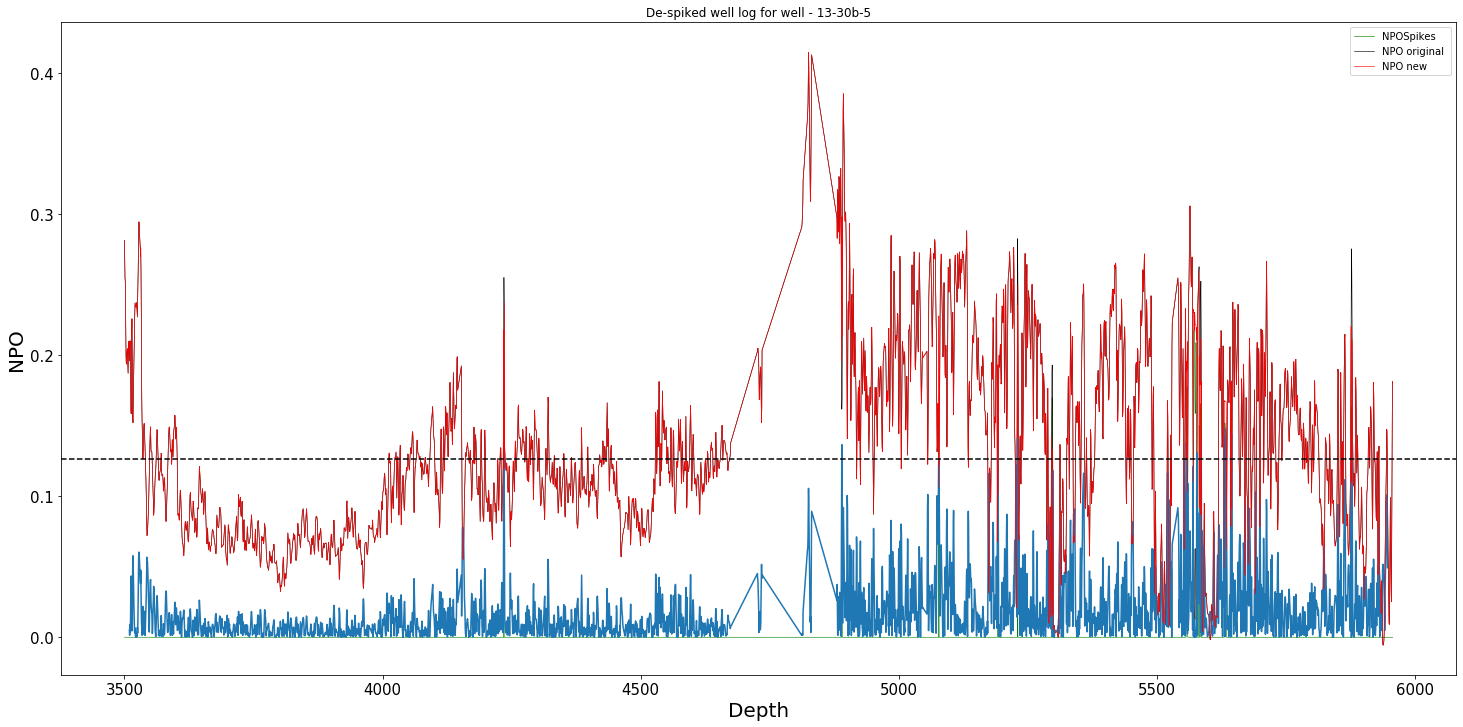

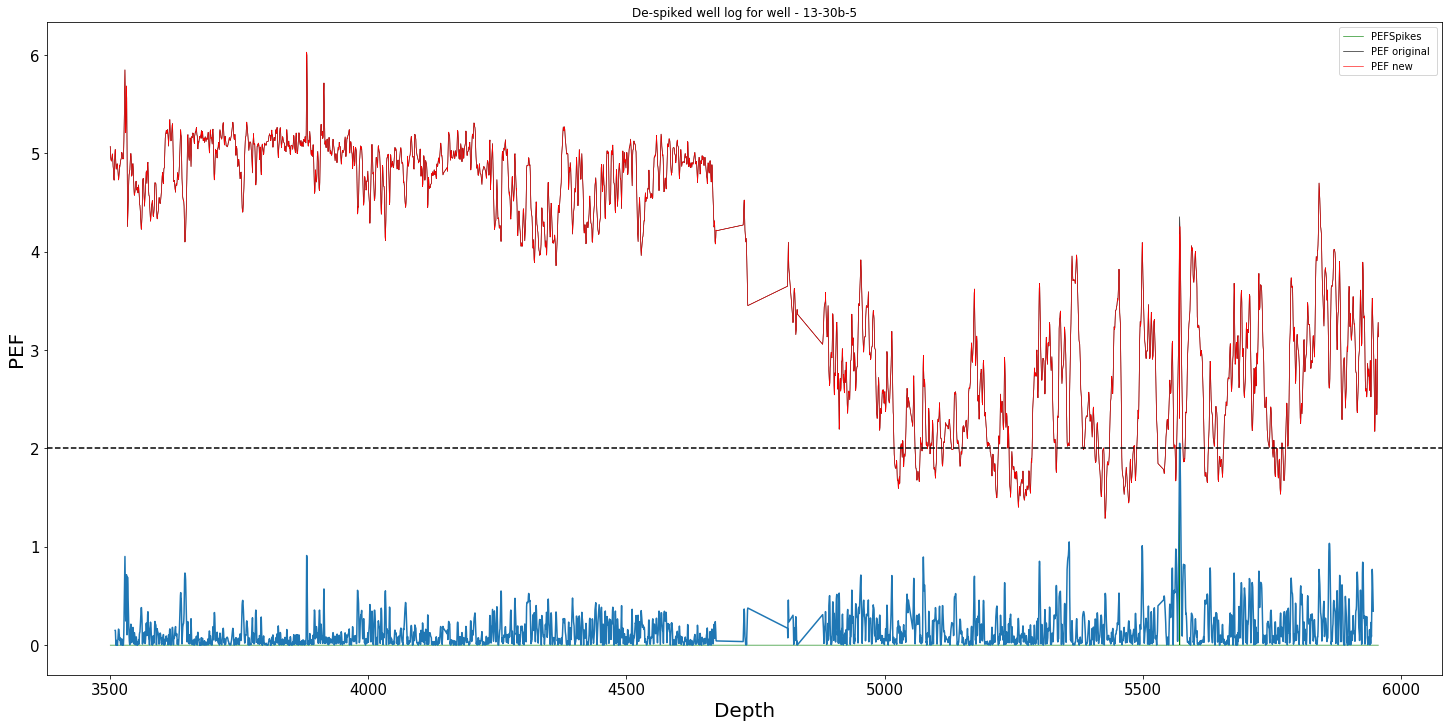

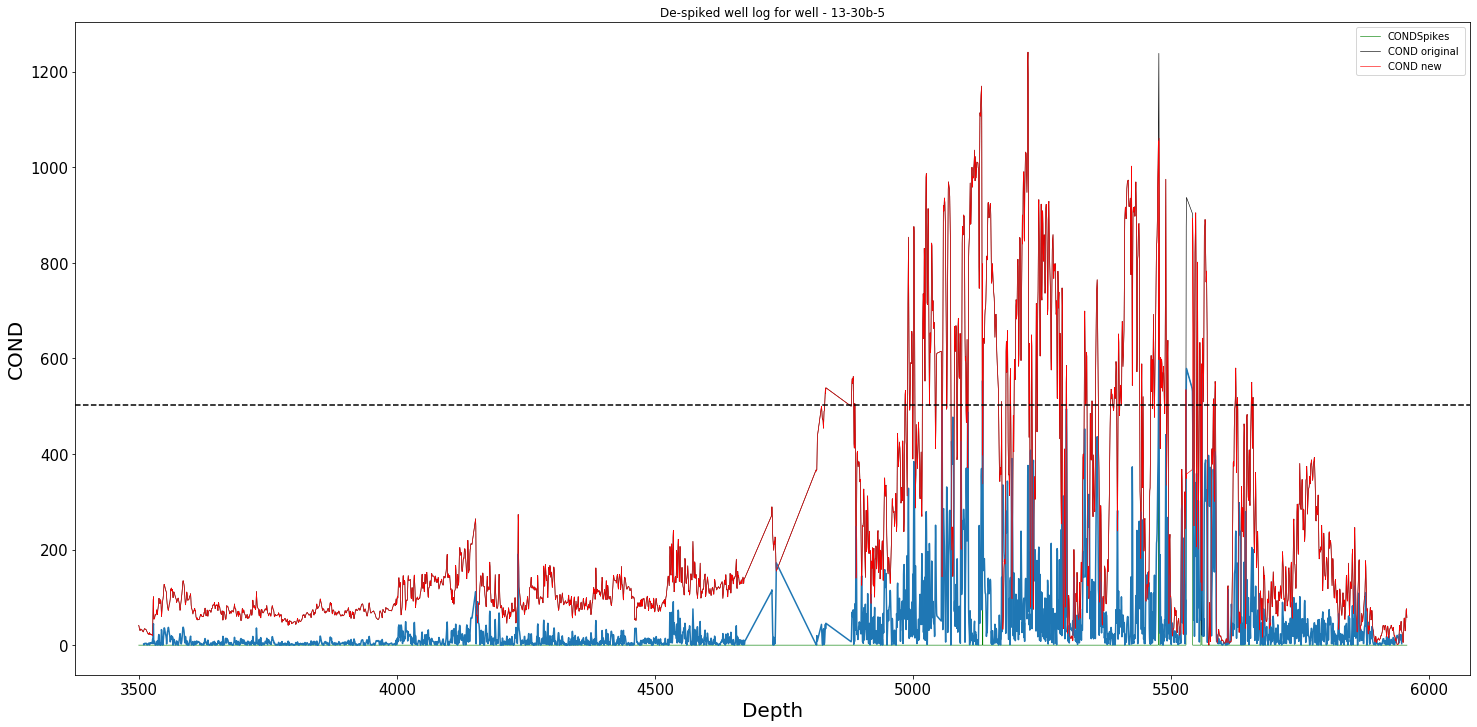

In [646]:
df['RHOB'] = filter(df, log='RHOB', loops=1, filter_window=10)
df['GR'] = filter(df, log='GR', harshness=0.99, loops=2, filter_window=10)
#df['DRES'] = filter(df, log='DRES')
#df['DT'] = filter(df, log='DT', loops=2)
df['NPO'] = filter(df, log='NPO', harshness=0.995)
#df['DTS'] = filter(df, log='DTS', loops=2)
df['PEF'] = filter(df, log='PEF', loops=2, harshness=0.995)
df['COND'] = filter(df, log='COND', loops=2, harshness=0.995)

In [63]:
col_list = ['DT', 'GR', 'RHOB', 'MRES', 'DTS', 'DRES', 'NPO', 'SRES']
col_list

['DT', 'GR', 'RHOB', 'MRES', 'DTS', 'DRES', 'NPO', 'SRES']

In [649]:
# Find the mean value of each well property e.g. Gamma Ray and then bulk shift each well so the mean matches the mean of the property
blank_df = pd.DataFrame(columns=(df.columns))
for well in top_count:
    df1 = df[df['Wellname']==well].copy()
    for log in col_list:
        log_mean = df[log].mean()
        well_mean = df1[log].mean()
        
        df1[log] = df1.loc[df['Wellname']==well][log] + (log_mean - well_mean)
        
        well_mean = df1.loc[df['Wellname']==well][log].mean()   
    blank_df = blank_df.append(df1)
df = blank_df

In [625]:
#df.groupby('Wellname').std().sort_values('NPO').reset_index(0,drop=True)

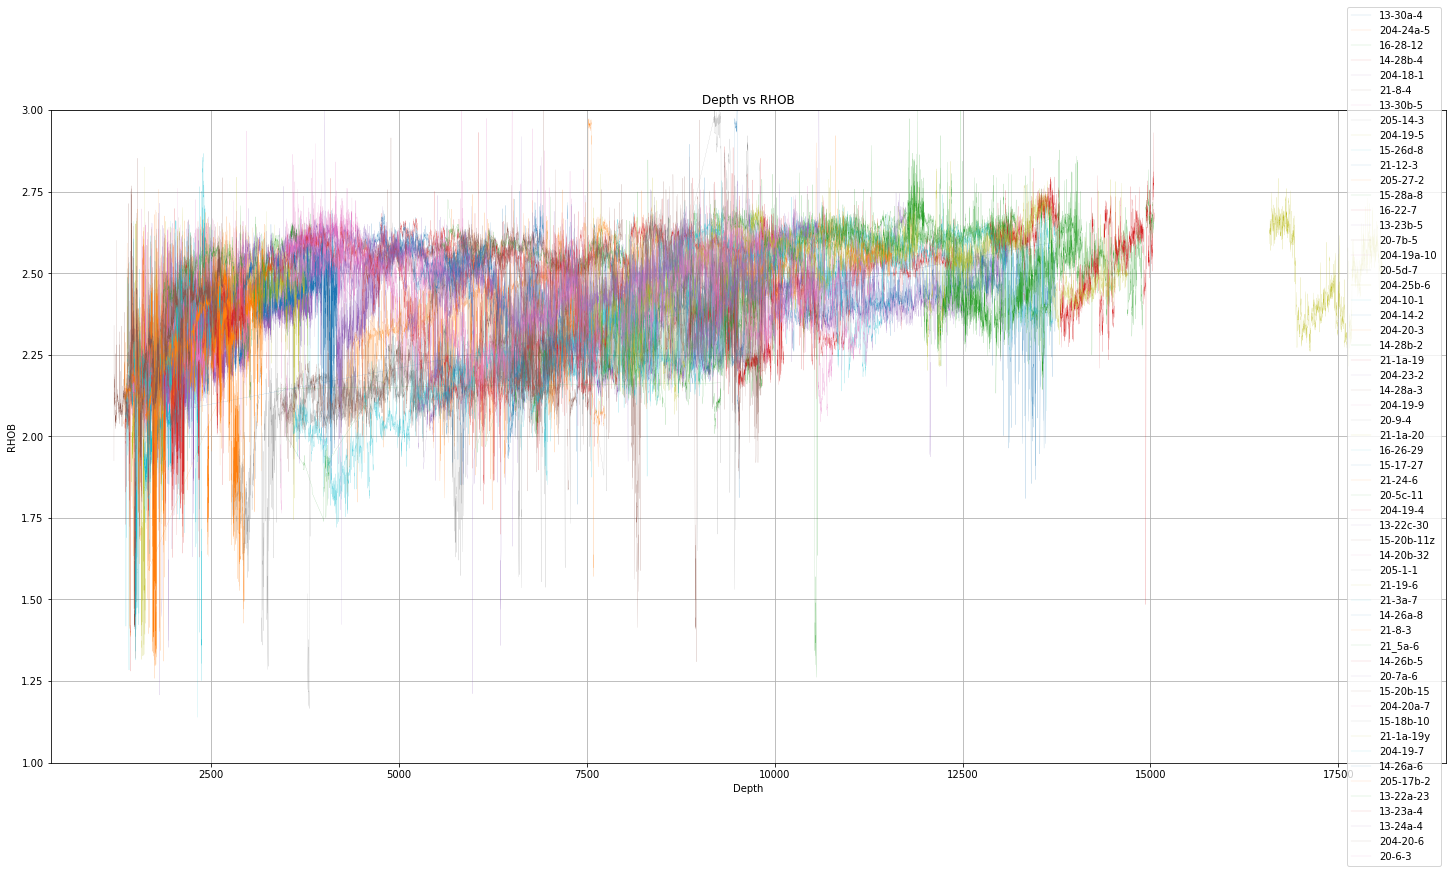

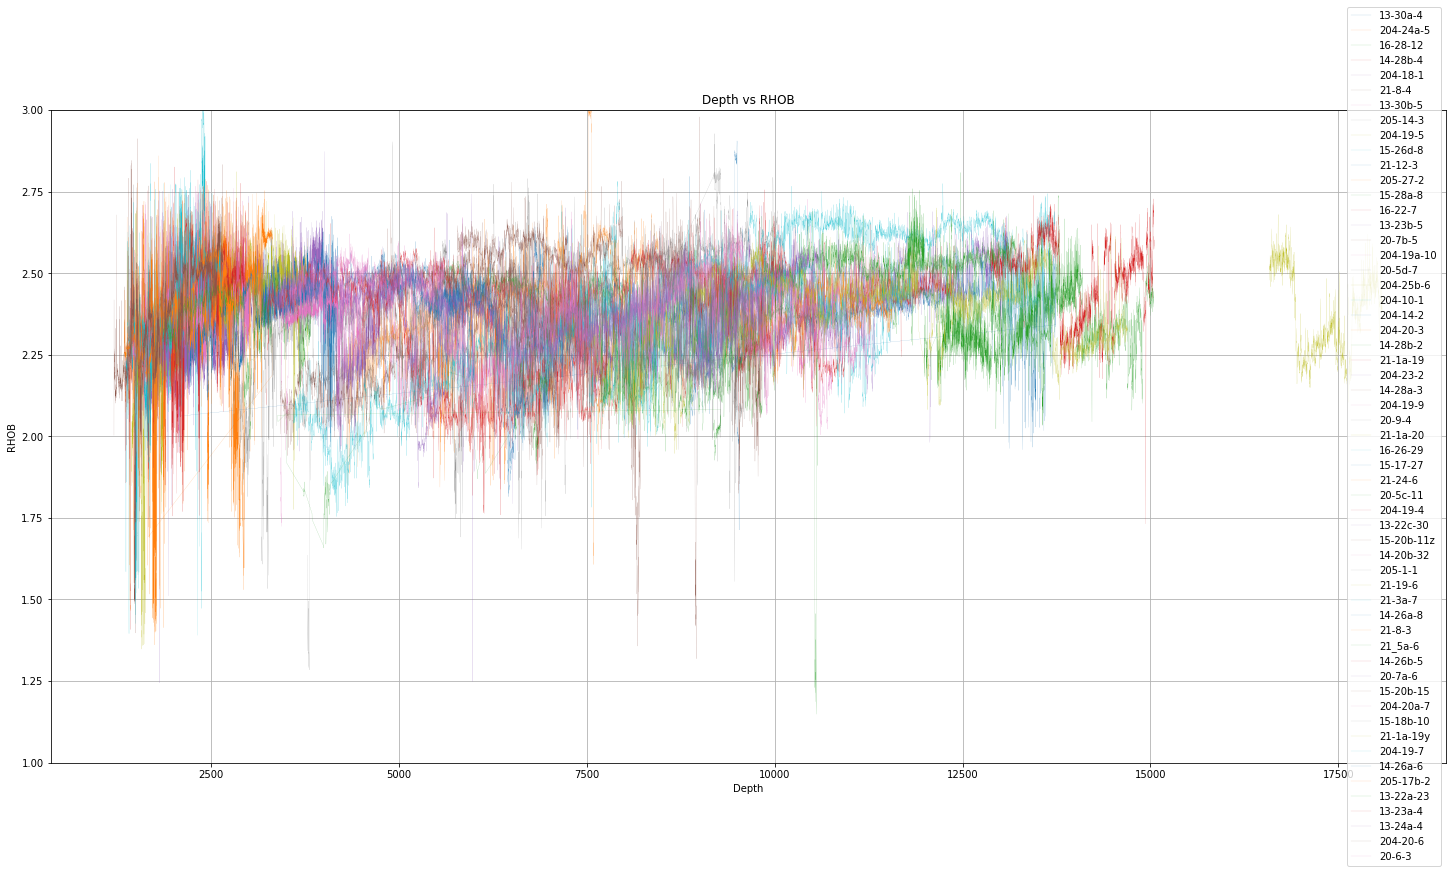

In [626]:
plt.figure(figsize=(25, 12))
for well in top_count:
    plt.plot(shear_filter[shear_filter["Wellname"] == well]["Depth"],
             (shear_filter[shear_filter["Wellname"] == well]["RHOB"]), linewidth=0.1, label=f"{well}")

plt.title('Depth vs RHOB')
plt.xlabel('Depth')
plt.ylabel('RHOB')
plt.ylim(1, 3)
#plt.yscale('log', basey=2)
#plt.xlim(0, 90)
plt.grid()
plt.legend(loc='right')
#plt.savefig('residual_deaths_50_countries.png')
plt.show()

plt.figure(figsize=(25, 12))
for well in top_count:
    plt.plot(df[df["Wellname"] == well]["Depth"],
             (df[df["Wellname"] == well]["RHOB"]), linewidth=0.1, label=f"{well}")

plt.title('Depth vs RHOB')
plt.xlabel('Depth')
plt.ylabel('RHOB')
plt.ylim(1, 3)
#plt.yscale('log', basey=2)
#plt.xlim(0, 90)
plt.grid()
plt.legend(loc='right')
#plt.savefig('residual_deaths_50_countries.png')
plt.show()

In [64]:
col_list = shear_filter.columns

In [650]:
df.to_csv("./data/train/Quad_21_2020_06_29.csv")

In [69]:
len(shear_filter['Wellname'].unique())

52

In [72]:
len(top_count)

52

In [96]:
random.seed(42)
test_list = random.sample(top_count, int(len(top_count)*0.3))
train_list = [i for i in top_count if i not in test_list]
#train_list = (df['Wellname'].nunique()) - int((df['Wellname'].nunique()) * 0.3)
#well_list = list(top_count[:test_list])
#well_list
test_list

['16-26-29',
 '204-23-2',
 '20-5d-7',
 '15-17-27',
 '204-19-4',
 '13-23b-5',
 '204-20a-7',
 '13-30b-5',
 '205-1-1',
 '14-28a-3',
 '205-12-1',
 '14-20b-32',
 '15-28a-8',
 '14-28b-2',
 '21-1a-19']

In [97]:
df_test = df[df['Wellname'].isin(test_list)]
df_train = df[~df['Wellname'].isin(well_list)]

In [99]:
df_test

,DT,GR,RHOB,Wellname,Depth,MRES,DTS,DRES,NPO,SRES
1021058,72.2022,34.8233,2.4195,13-23b-5,2852.5,5.5096,141.0703,6.1732,0.2141,5.7306
1021059,72.0571,34.4620,2.4353,13-23b-5,2853.0,5.5029,141.4955,6.1430,0.2132,5.7012
1021060,72.0499,33.0915,2.4456,13-23b-5,2853.5,4.9790,141.9729,5.5396,0.1995,5.6003
1021061,72.0469,31.6418,2.4428,13-23b-5,2854.0,5.0707,141.8526,5.6227,0.2107,5.6346
1021062,71.6274,32.1229,2.4349,13-23b-5,2854.5,5.1839,142.0057,5.7882,0.2077,5.6916
...,...,...,...,...,...,...,...,...,...,...
12749212,65.9819,91.4800,2.6589,21-1a-19,15048.0,2.5200,115.7004,10.2000,0.2363,1.6600
12749213,68.2127,92.1400,2.6857,21-1a-19,15048.5,2.3200,121.6951,9.3400,0.2416,1.6200
12749214,69.8548,92.3200,2.6590,21-1a-19,15049.0,2.1800,125.4236,8.6600,0.2542,1.5800
12749215,69.3449,92.3800,2.6749,21-1a-19,15049.5,2.0900,132.6825,8.2600,0.2616,1.5400


In [98]:
folder_create = os.path.exists("data")
if folder_create is False:
    os.mkdir("./data")
    os.mkdir("./data/train")
    os.mkdir("./data/test")
folder_create = os.path.exists("./data/train")
if folder_create is False:
    os.mkdir("./data/train")
    os.mkdir("./data/test")

In [100]:
target_feature = ['DTS']
train_feature = ['GR', 'DT', 'DRES', 'MRES', 'SRES', 'NPO', 'RHOB', 'Depth']

In [101]:
X_train = df_train.loc[:, train_feature]
X_test = df_test.loc[:, train_feature]

y_train = df_train.loc[:, target_feature]
y_test = df_test.loc[:, target_feature]

In [102]:
X_train.to_csv("./data/train/train_x_2020_06_29.csv")
y_train.to_csv("./data/train/train_y_2020_06_29.csv")
X_test.to_csv("./data/test/test_x_2020_06_29.csv")
y_test.to_csv("./data/test/test_y_2020_06_29.csv")